In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv
import cv2
import os

In [2]:
# download the checkpoint demo
# !mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
# config_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco.py'
# checkpoint_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
config_file = '../configs/rtmdet/rtmdet_nano_320-8xb32_coco-ear.py'
checkpoint_file = '../work_dirs/rtmdet_nano_320-8xb32_coco-ear/epoch_120.pth'

In [3]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ../work_dirs/rtmdet_nano_320-8xb32_coco-ear/epoch_120.pth
12/20 16:46:42 - mmengine - WARNING - configs/_base_/datasets/custom.py is not a meta file, simply parsed as meta information


In [114]:
# test a single image
ffhq = "../../object_detection_evaluation"


img = mmcv.imread( "../../object_detection_evaluation/data/600.png", channel_order='rgb')
result = inference_detector(model, img)
print(result)

<DetDataSample(

    META INFORMATION
    img_id: 0
    ori_shape: (750, 540)
    img_shape: (320, 320)
    pad_shape: (320, 320)
    batch_input_shape: (320, 320)
    img_path: None
    scale_factor: (0.42592592592592593, 0.4266666666666667)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x14cb2f84d00>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x14cb2f84be0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[2.1337e+02, 5.0275e+02, 3.6824e+02, 6.8459e+02],
                        [1.0456e+02, 0.0000e+00, 3.7202e+02, 9.7688e+01],
                        [9.7363e+01, 2.5322e-01, 3.8540e+02, 5.9053e+01],
                        [1.1398e+02, 0.0000e+00, 3.7509e+02, 2.9643e+01],
                        [1.2099e+02, 7.2558e+02, 4.0073e+02, 7.50

In [115]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

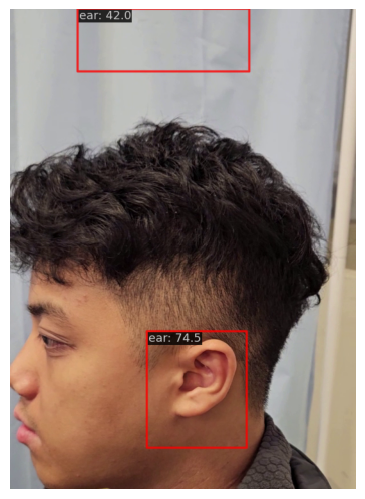

In [116]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

In [73]:
img = cv2.imread( "../../ear_detection1/dataset/eval_set/0.png")
dataset_json = "../../ear_detection1/dataset/eval_set_json/bbox.json"
import json
with open(dataset_json, "r") as bbox_file:
    gt_bbox = json.load(bbox_file)
gt = gt_bbox["0"]
cv2.rectangle(img, (gt[0], gt[1]), (gt[0]+gt[2], gt[1]+gt[3]), (0, 255, 0), 2)
cv2.imshow("123",img)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>